# 1. Read data from csv

In [2]:
import pandas as pd

gtd=pd.read_csv('gtd_clean.csv',encoding='latin1',low_memory=False)

gtd.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
1,5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
2,6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
3,10,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
4,11,1.970010e+11,1970,1,6,NaN,0,NaN,217,United States,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN


# 2. create methods for log regression and vectorization of target classes

In [28]:
from sklearn import preprocessing
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pandas import Series as s
import itertools
import numpy as np
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler,SMOTE

def confMatrix(model,xTest,yTest):
    predYTest=model.predict(xTest)
    cm=confusion_matrix(yTest,predYTest)
    return cm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (30,25))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#simple implementation of logistic regression
def logRegr(features,itarget):

    lr=lm.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1e5, fit_intercept=True, 
                             intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                             max_iter=150, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

    features,itarget=random_over_sampling(features,itarget)
    lr.fit(features, itarget)
    #cm=confMatrix(lr,X_test,y_test)
    #plot_confusion_matrix(cm,np.unique(itarget),normalize=True)
    return lr
    
# vectorize the output classes to get numerical values
def transformData(target):
    le = preprocessing.LabelEncoder()
    le.fit(target)
    target=le.transform(target)
    return target
    
    

# 3. Logistic regression based on regions

In [29]:
import random
random.seed(1001)

for i in range(12):
    regionTxt=s.unique(gtd['region_txt'])[i]
    region=s.unique(gtd['region'])[i]
    regData=gtd[gtd['region']==region]
    itarget=transformData(regData['gname'])
    features=regData[['country', 'attacktype1', 'iyear','targtype1','success','specificity']]
    print("Region "+str(region)+": "+regionTxt+' '+str(regData.shape))
    print("No of terrorist groups identified in the region: "+str(s.unique(regData['gname']).shape[0]))
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(features, itarget, test_size=0.30)
    
    model=logRegr(X_train,y_train)
    
    print("Prediction score: "+str(model.score(X_test, y_test)*100)+'%')

Region 1: North America (2214, 138)
No of terrorist groups identified in the region: 110
Prediction score: 10.5263157895%
Region 3: South America (13136, 138)
No of terrorist groups identified in the region: 115
Prediction score: 3.90763765542%
Region 11: Sub-Saharan Africa (8132, 138)
No of terrorist groups identified in the region: 148
Prediction score: 1.9262295082%
Region 5: Southeast Asia (5188, 138)
No of terrorist groups identified in the region: 84
Prediction score: 6.55105973025%
Region 8: Western Europe (10444, 138)
No of terrorist groups identified in the region: 242
Prediction score: 2.26547543076%
Region 2: Central America & Caribbean (6462, 138)
No of terrorist groups identified in the region: 89
Prediction score: 9.33470861269%
Region 10: Middle East & North Africa (15089, 138)
No of terrorist groups identified in the region: 209
Prediction score: 2.23105809587%
Region 4: East Asia (275, 138)
No of terrorist groups identified in the region: 25
Prediction score: 28.915662

Automatically created module for IPython interactive environment


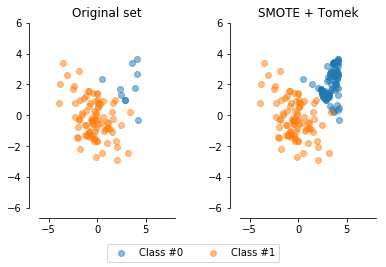